# Import the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from category_encoders import HelmertEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Dataset\data.csv')
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [3]:
df=df.drop('ID',axis=1)

## Exploratory Data Analysis

In [4]:
df.shape

(209499, 42)

In [5]:
df.columns.values

array(['age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'], dtype=object)

In [6]:
df.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


In [7]:
df.describe(include='O').T

,count,unique,top,freq
gender,209499,2,Female,108784
education,209499,17,High school graduate,50627
class,104254,8,Private,75617
education_institute,13302,2,High school,7247
marital_status,209499,7,Never married,90723
race,209499,5,White,175709
is_hispanic,209499,10,All other,180404
employment_commitment,209499,8,Children or Armed Forces,129789
unemployment_reason,6520,5,Other job loser,2242
is_labor_union,20079,2,No,16968


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             209499 non-null  int64  
 1   gender                          209499 non-null  object 
 2   education                       209499 non-null  object 
 3   class                           104254 non-null  object 
 4   education_institute             13302 non-null   object 
 5   marital_status                  209499 non-null  object 
 6   race                            209499 non-null  object 
 7   is_hispanic                     209499 non-null  object 
 8   employment_commitment           209499 non-null  object 
 9   unemployment_reason             6520 non-null    object 
 10  employment_stat                 209499 non-null  int64  
 11  wage_per_hour                   209499 non-null  int64  
 12  is_labor_union  

In [9]:
df.isna().sum()

age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit                            0
tax_status      

In [10]:
df['income_above_limit'].value_counts() #the target feature

income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64

<Axes: xlabel='income_above_limit', ylabel='count'>

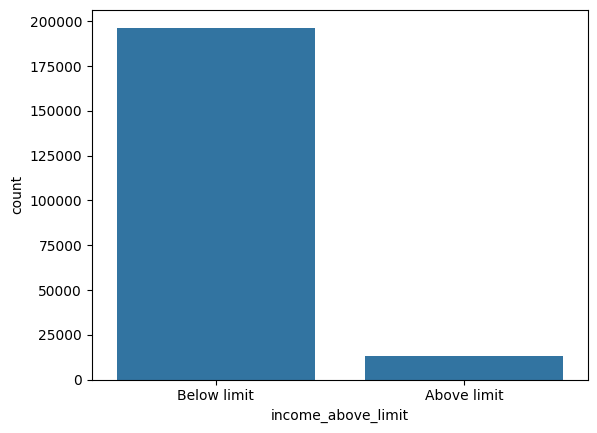

In [11]:
sns.countplot(x=df['income_above_limit']) # the imbalance in the target variable

In [12]:
df.replace({' ?':np.nan},inplace=True)

In [13]:
for col in df.columns.values:
    print(df[col].value_counts().sort_index(),'\n\n')  #print all the unique values each column has

age
0     3041
1     3198
2     3363
3     3466
4     3513
      ... 
86     342
87     309
88     266
89     206
90     753
Name: count, Length: 91, dtype: int64 


gender
 Female    108784
 Male      100715
Name: count, dtype: int64 


education
 10th grade                                 7905
 11th grade                                 7260
 12th grade no diploma                      2282
 1st 2nd 3rd or 4th grade                   1917
 5th or 6th grade                           3542
 7th and 8th grade                          8438
 9th grade                                  6540
 Associates degree-academic program         4494
 Associates degree-occup /vocational        5650
 Bachelors degree(BA AB BS)                20979
 Children                                  49685
 Doctorate degree(PhD EdD)                  1318
 High school graduate                      50627
 Less than 1st grade                         829
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 Prof school degr

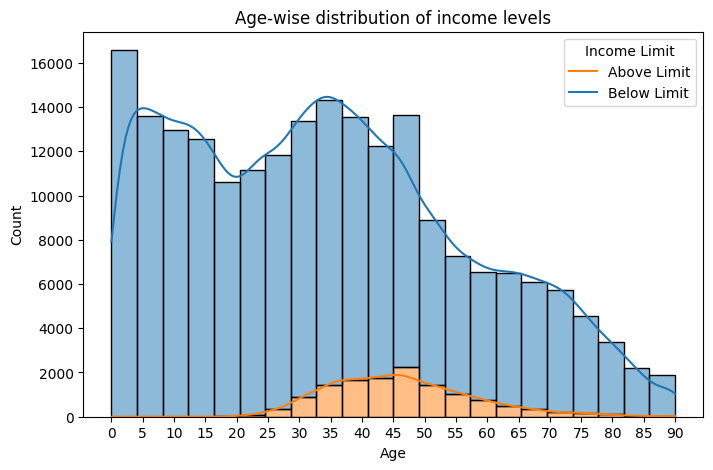

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(data = df,x='age',hue='income_above_limit',multiple='stack',kde=True,bins=22,legend=True)
plt.xticks(np.arange(0,95,5))
plt.xlabel('Age')
plt.legend(['Above Limit','Below Limit'],title='Income Limit')
plt.title('Age-wise distribution of income levels')
plt.show()

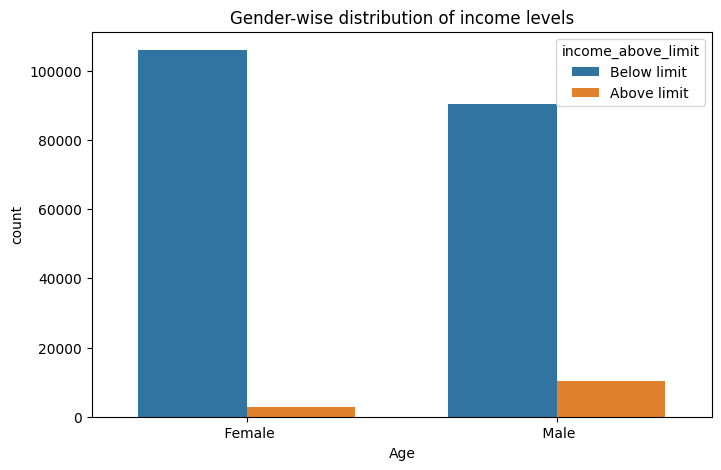

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data = df,x='gender',hue='income_above_limit',width=0.7)
plt.xlabel('Age')
plt.title('Gender-wise distribution of income levels')
plt.show()

In [16]:
df.columns.values

array(['age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'], dtype=object)

In [17]:
cols = ['education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'is_labor_union','industry_code_main', 'occupation_code_main']

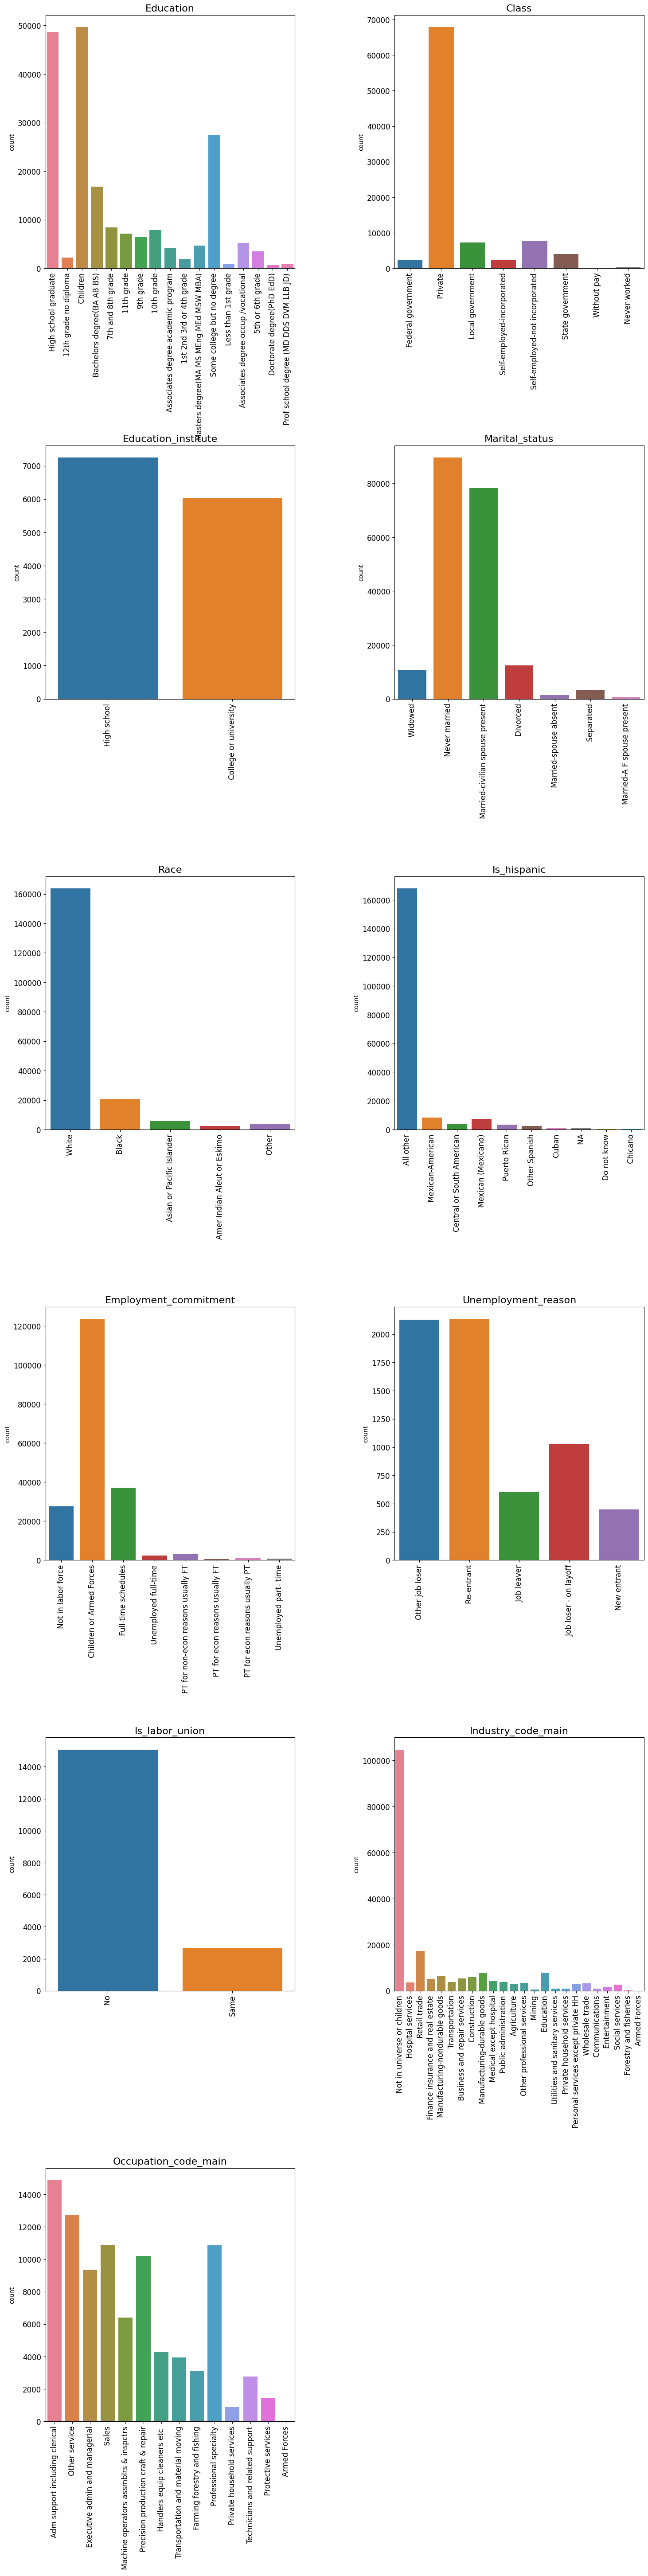

In [18]:
ss=0
plt.figure(figsize=(15,80))
for i in cols:
    ss+=1
    plt.subplot(7,2,ss)
    sns.countplot(x=i,data=df[df['income_above_limit']=='Below limit'],hue=i,legend=False)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i.capitalize(),fontsize=16)
    plt.xlabel(None)

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
plt.show()

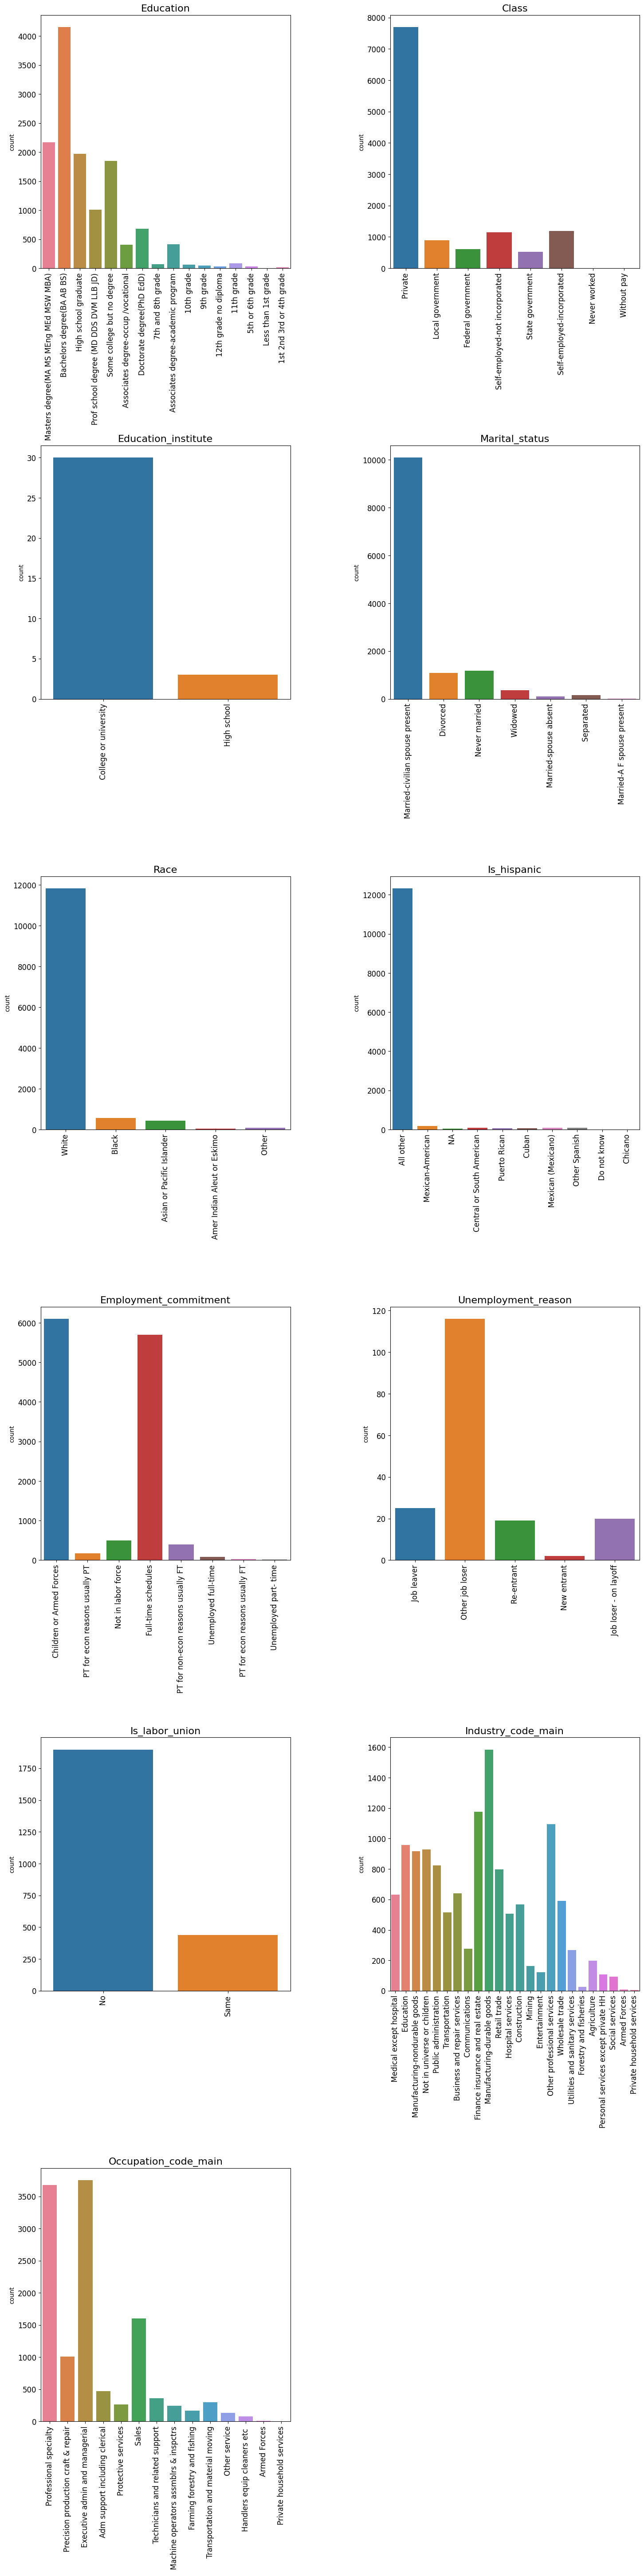

In [19]:
ss=0
plt.figure(figsize=(15,80))
for i in cols:
    ss+=1
    plt.subplot(7,2,ss)
    sns.countplot(x=i,data=df[df['income_above_limit']=='Above limit'],hue=i,legend=False)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i.capitalize(),fontsize=16)
    plt.xlabel(None)

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
plt.show()

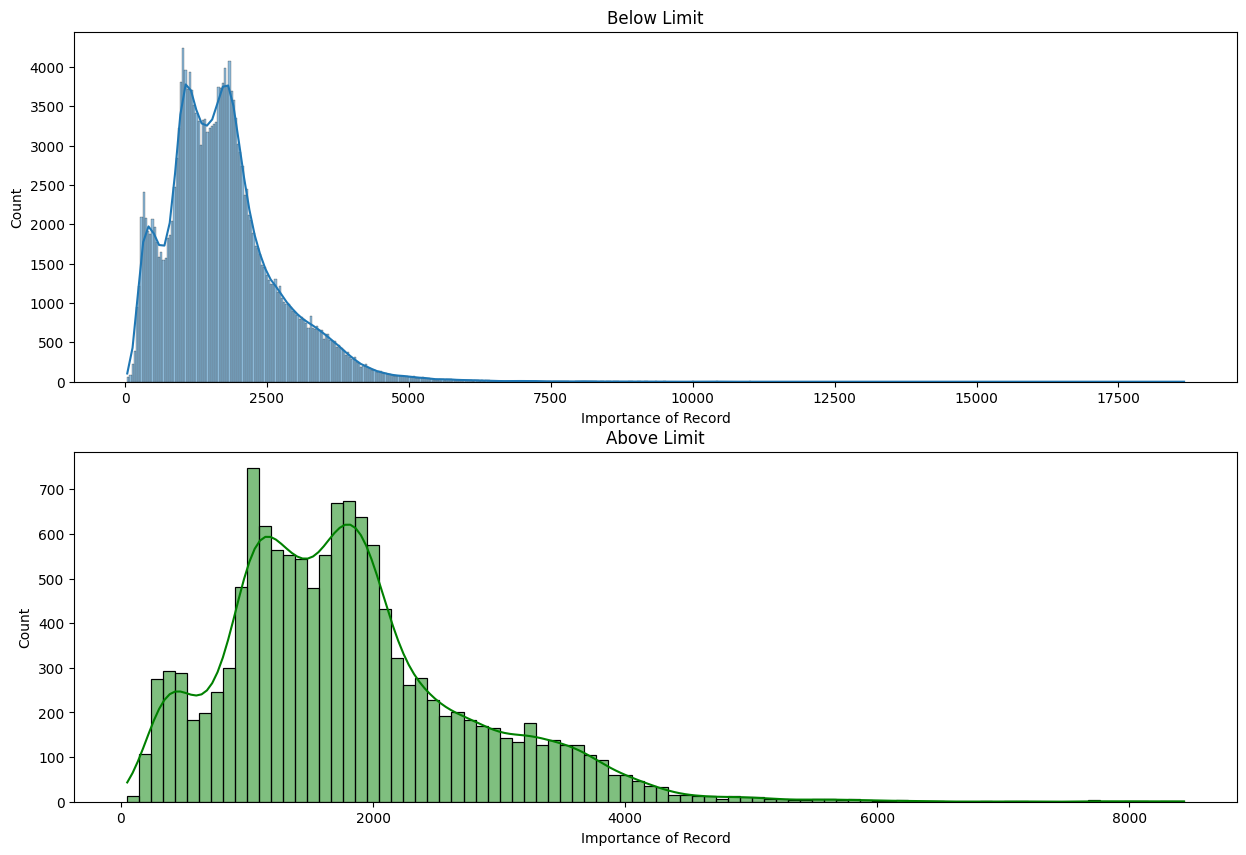

In [20]:
plt.figure(figsize=(15,10))
#plt.title('Histograms for Importance of record(income-level-wise)')

plt.subplot(2,1,1)
sns.histplot(data=df[df['income_above_limit']!='Above limit'],x='importance_of_record',kde=True)
plt.xlabel('Importance of Record')
plt.title('Below Limit')

plt.subplot(2,1,2)
sns.histplot(data=df[df['income_above_limit']=='Above limit'],x='importance_of_record',kde=True,color='g')
plt.xlabel('Importance of Record')
plt.title('Above Limit')

plt.show()

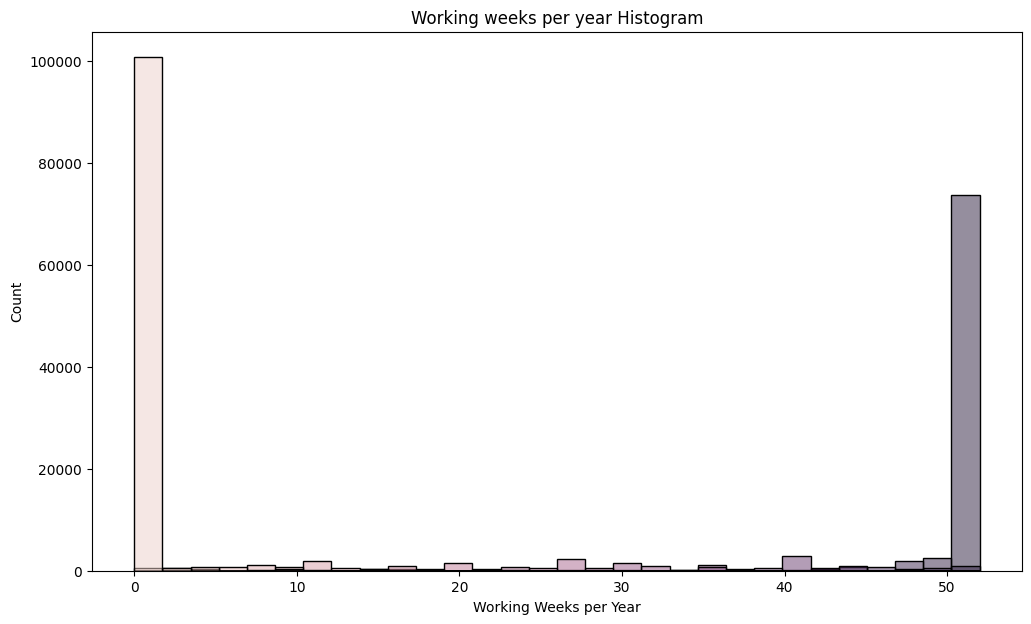

In [21]:
plt.figure(figsize=(12,7))
sns.histplot(data=df,x='working_week_per_year',hue='working_week_per_year',legend=False)
plt.xlabel('Working Weeks per Year')
plt.title('Working weeks per year Histogram')
plt.show()

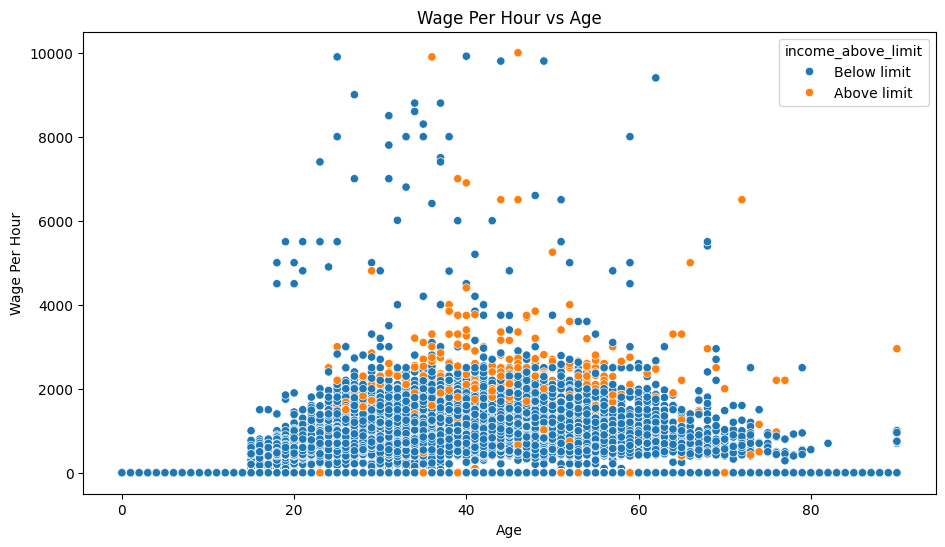

In [22]:
plt.figure(figsize=(11,6))
sns.scatterplot(data=df,x='age',y='wage_per_hour',hue='income_above_limit')
plt.xlabel('Age')
plt.ylabel('Wage Per Hour')
plt.title('Wage Per Hour vs Age')
plt.show()

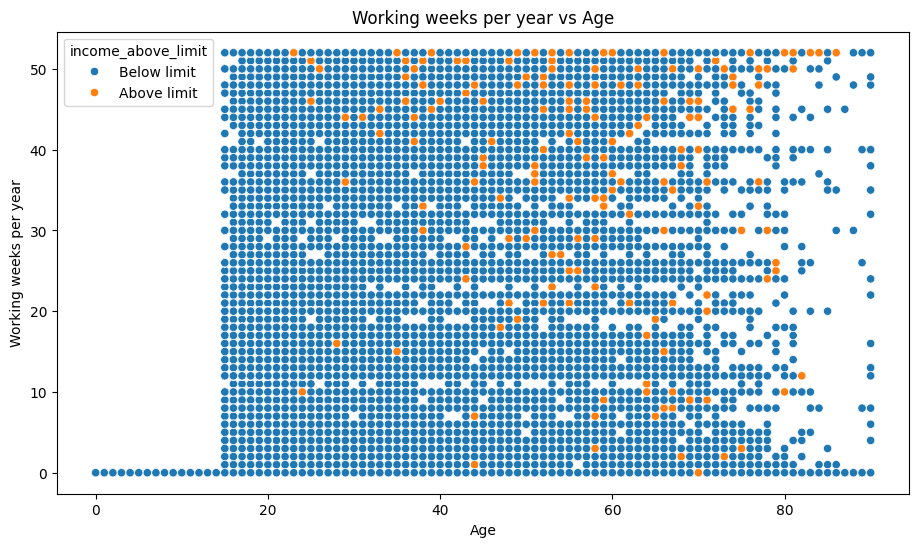

In [23]:
plt.figure(figsize=(11,6))
sns.scatterplot(data=df,x='age',y='working_week_per_year',hue='income_above_limit')
plt.xlabel('Age')
plt.ylabel('Working weeks per year')
plt.title('Working weeks per year vs Age')
plt.show()

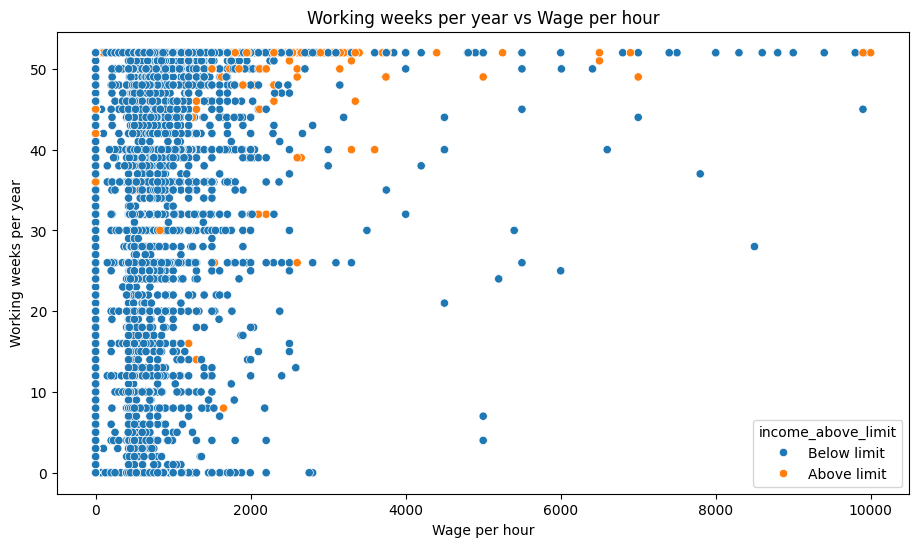

In [24]:
plt.figure(figsize=(11,6))
sns.scatterplot(data=df,x='wage_per_hour',y='working_week_per_year',hue='income_above_limit')
plt.xlabel('Wage per hour')
plt.ylabel('Working weeks per year')
plt.title('Working weeks per year vs Wage per hour')
plt.show()

In [25]:
df.columns.values

array(['age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'], dtype=object)

# Data Pre-processing

In [26]:

missing_df = df.isna().sum().reset_index()
missing_df = missing_df.rename(columns={0:'# missing','index':'Column'})
missing_df['% missing'] = round(missing_df['# missing']/df.shape[0]*100,0)
missing_df

,Column,# missing,% missing
0,age,0,0.0
1,gender,0,0.0
2,education,0,0.0
3,class,105245,50.0
4,education_institute,196197,94.0
5,marital_status,0,0.0
6,race,0,0.0
7,is_hispanic,0,0.0
8,employment_commitment,0,0.0
9,unemployment_reason,202979,97.0


In [27]:
missing_df.columns.values #missing data
missing_df['mostly missing'] =  missing_df['% missing'].apply(lambda x : True if x>40.0 else False)
missing_df

,Column,# missing,% missing,mostly missing
0,age,0,0.0,False
1,gender,0,0.0,False
2,education,0,0.0,False
3,class,105245,50.0,True
4,education_institute,196197,94.0,True
5,marital_status,0,0.0,False
6,race,0,0.0,False
7,is_hispanic,0,0.0,False
8,employment_commitment,0,0.0,False
9,unemployment_reason,202979,97.0,True


In [28]:
major_missing_cols = list(x for x in missing_df['Column'] if bool(missing_df[missing_df['Column']==x]['mostly missing'].values)==True)

## Links and Images


<!-- [Text](link) -->
[Link Text](https://medium.com/@ahmedazizkhelifi "Optional Title")
<!-- ![Alt Text](image path "title") -->
![Alt Text](https://miro.medium.com/max/80/0*PRNVc7bjff0Jj1pm.png "Optional Title")
<!-- [![Alt Text](image path "title")](link) -->
[![Alt Text](https://miro.medium.com/max/80/0*PRNVc7bjff0Jj1pm.png "Optional Title")](https://medium.com/@ahmedazizkhelifi)


##Code and Syntax Highlighting

```python
def staySafe(Coronavirus)
  if not home:
    return home
```

In [29]:
major_missing_cols

['class',
 'education_institute',
 'unemployment_reason',
 'is_labor_union',
 'occupation_code_main',
 'under_18_family',
 'veterans_admin_questionnaire',
 'migration_code_change_in_msa',
 'migration_prev_sunbelt',
 'migration_code_move_within_reg',
 'migration_code_change_in_reg',
 'residence_1_year_ago',
 'old_residence_reg',
 'old_residence_state']

<div style="border-radius:1px; border: #0000FF solid; padding: 15px; background-color: #BEU6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Observation 1: Education's Impact on income level?</font>

In [75]:
df['education'].value_counts()

education
 High school graduate                      50627
 Children                                  49685
 Some college but no degree                29320
 Bachelors degree(BA AB BS)                20979
 7th and 8th grade                          8438
 10th grade                                 7905
 11th grade                                 7260
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 9th grade                                  6540
 Associates degree-occup /vocational        5650
 Associates degree-academic program         4494
 5th or 6th grade                           3542
 12th grade no diploma                      2282
 1st 2nd 3rd or 4th grade                   1917
 Prof school degree (MD DDS DVM LLB JD)     1852
 Doctorate degree(PhD EdD)                  1318
 Less than 1st grade                         829
Name: count, dtype: int64

In [77]:
edudf = df[['education','income_above_limit']].copy(deep=True)
edudf.head()

,education,income_above_limit
0,High school graduate,Below limit
1,High school graduate,Below limit
2,12th grade no diploma,Below limit
3,Children,Below limit
4,High school graduate,Below limit


In [78]:
for i in edudf['education'].value_counts().sort_index().index[0:7]:
    edudf.replace({i:' Upto 12th grade'},inplace=True)

edudf.replace({' Less than 1st grade':' Upto 12th grade'},inplace=True)

In [80]:
edudf['education'].value_counts()

education
 High school graduate                      50627
 Children                                  49685
 Upto 12th grade                           38713
 Some college but no degree                29320
 Bachelors degree(BA AB BS)                20979
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 Associates degree-occup /vocational        5650
 Associates degree-academic program         4494
 Prof school degree (MD DDS DVM LLB JD)     1852
 Doctorate degree(PhD EdD)                  1318
Name: count, dtype: int64

In [81]:
education_df = edudf['education'].value_counts().reset_index()
education_df.rename(columns={'education':'Education','count':'Total'},inplace=True)
education_df['Income Above Limit'] = education_df['Education'].apply(lambda x : edudf[(edudf['education']==x) & (edudf['income_above_limit']=='Above limit')].count()[0])
education_df['Income Below Limit'] = education_df['Education'].apply(lambda x : edudf[(edudf['education']==x) & (edudf['income_above_limit']=='Below limit')].count()[0])
education_df['Income Above Limit'] = education_df['Income Above Limit'].astype(str)+' ('+(round(education_df['Income Above Limit']/education_df['Total']*100,2).astype(str))+'%)'
education_df['Income Below Limit'] = education_df['Income Below Limit'].astype(str)+' ('+(round(education_df['Income Below Limit']/education_df['Total']*100,2).astype(str))+'%)'
education_df

,Education,Total,Income Above Limit,Income Below Limit
0,High school graduate,50627,1973 (3.9%),48654 (96.1%)
1,Children,49685,0 (0.0%),49685 (100.0%)
2,Upto 12th grade,38713,344 (0.89%),38369 (99.11%)
3,Some college but no degree,29320,1850 (6.31%),27470 (93.69%)
4,Bachelors degree(BA AB BS),20979,4154 (19.8%),16825 (80.2%)
5,Masters degree(MA MS MEng MEd MSW MBA),6861,2169 (31.61%),4692 (68.39%)
6,Associates degree-occup /vocational,5650,409 (7.24%),5241 (92.76%)
7,Associates degree-academic program,4494,413 (9.19%),4081 (90.81%)
8,Prof school degree (MD DDS DVM LLB JD),1852,1007 (54.37%),845 (45.63%)
9,Doctorate degree(PhD EdD),1318,679 (51.52%),639 (48.48%)


In [82]:
edu_fig = px.sunburst(data_frame=edudf,path=['education','income_above_limit'],width=960,height=960,labels={'parent':'Education','labels':'Income Level','id':'Category','count':'Number'},title='Income level distribution (Education-wise)')
edu_fig.show()

<div style="border-radius:1px; border: #0000FF solid; padding: 15px; background-color: #BEU6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Observation 2: Which classes have higher income levels?</font>

In [84]:
df['class'].value_counts()

class
 Private                           75617
 Self-employed-not incorporated     8957
 Local government                   8093
 State government                   4480
 Self-employed-incorporated         3444
 Federal government                 3047
 Never worked                        449
 Without pay                         167
Name: count, dtype: int64

In [86]:
classdf = df[['class','income_above_limit']].copy(deep=True)
classdf.head()

,class,income_above_limit
0,NaN,Below limit
1,NaN,Below limit
2,Federal government,Below limit
3,NaN,Below limit
4,NaN,Below limit


In [87]:
class_df = classdf['class'].value_counts().reset_index()
class_df.rename(columns={'class':'Class','count':'Total'},inplace=True)
class_df['Income Above Limit'] = class_df['Class'].apply(lambda x : classdf[(classdf['class']==x) & (classdf['income_above_limit']=='Above limit')].count()[0])
class_df['Income Below Limit'] = class_df['Class'].apply(lambda x : classdf[(classdf['class']==x) & (classdf['income_above_limit']=='Below limit')].count()[0])
class_df['Income Above Limit'] = class_df['Income Above Limit'].astype(str)+' ('+(round(class_df['Income Above Limit']/class_df['Total']*100,2).astype(str))+'%)'
class_df['Income Below Limit'] = class_df['Income Below Limit'].astype(str)+' ('+(round(class_df['Income Below Limit']/class_df['Total']*100,2).astype(str))+'%)'
class_df

,Class,Total,Income Above Limit,Income Below Limit
0,Private,75617,7698 (10.18%),67919 (89.82%)
1,Self-employed-not incorporated,8957,1145 (12.78%),7812 (87.22%)
2,Local government,8093,886 (10.95%),7207 (89.05%)
3,State government,4480,529 (11.81%),3951 (88.19%)
4,Self-employed-incorporated,3444,1197 (34.76%),2247 (65.24%)
5,Federal government,3047,612 (20.09%),2435 (79.91%)
6,Never worked,449,2 (0.45%),447 (99.55%)
7,Without pay,167,1 (0.6%),166 (99.4%)


In [92]:
class_fig = px.sunburst(data_frame=classdf.dropna(axis=0),path=['class','income_above_limit'],width=960,height=960,labels={'parent':'Class','labels':'Income Level','id':'Category','count':'Number'},title='Income level distribution (Class-wise)')
class_fig.show()

In [94]:
df['citizenship'].value_counts()

citizenship
Native                                          185669
 Foreign born- Not a citizen of U S              14127
 Foreign born- U S citizen by naturalization      6208
 Native- Born abroad of American Parent(s)        1924
 Native- Born in Puerto Rico or U S Outlying      1571
Name: count, dtype: int64

In [100]:
citizendf = df[['citizenship','income_above_limit']].copy(deep=True)
citizendf.head(2).iloc[0][0]

'Native'

In [101]:
for i in citizendf['citizenship'].unique():
    if i!='Native':
        citizendf.replace({i:'Non-Native'},inplace=True)

In [103]:
citizendf['citizenship'].value_counts()

citizenship
Native        185669
Non-Native     23830
Name: count, dtype: int64

In [105]:
citizen_df = citizendf['citizenship'].value_counts().reset_index()
citizen_df.rename(columns={'citizenship':'Citizenship','count':'Total'},inplace=True)
citizen_df['Income Above Limit'] = citizen_df['Citizenship'].apply(lambda x : citizendf[(citizendf['citizenship']==x) & (citizendf['income_above_limit']=='Above limit')].count()[0])
citizen_df['Income Below Limit'] = citizen_df['Citizenship'].apply(lambda x : citizendf[(citizendf['citizenship']==x) & (citizendf['income_above_limit']=='Below limit')].count()[0])
citizen_df['Income Above Limit'] = citizen_df['Income Above Limit'].astype(str)+' ('+(round(citizen_df['Income Above Limit']/citizen_df['Total']*100,2).astype(str))+'%)'
citizen_df['Income Below Limit'] = citizen_df['Income Below Limit'].astype(str)+' ('+(round(citizen_df['Income Below Limit']/citizen_df['Total']*100,2).astype(str))+'%)'
citizen_df

,Citizenship,Total,Income Above Limit,Income Below Limit
0,Native,185669,11710 (6.31%),173959 (93.69%)
1,Non-Native,23830,1288 (5.4%),22542 (94.6%)


In [106]:
df.columns.values

array(['age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'], dtype=object)

In [108]:
df['race'].value_counts().reset_index()

,race,count
0,White,175709
1,Black,21394
2,Asian or Pacific Islander,6056
3,Other,3927
4,Amer Indian Aleut or Eskimo,2413


In [121]:
plt.pie?

Signature:
plt.pie(
    x: 'ArrayLike',
    explode: 'ArrayLike | None' = None,
    labels: 'Sequence[str] | None' = None,
    colors: 'ColorType | Sequence[ColorType] | None' = None,
    autopct: 'str | Callable[[float], str] | None' = None,
    pctdistance: 'float' = 0.6,
    shadow: 'bool' = False,
    labeldistance: 'float | None' = 1.1,
    startangle: 'float' = 0,
    radius: 'float' = 1,
    counterclock: 'bool' = True,
    wedgeprops: 'dict[str, Any] | None' = None,
    textprops: 'dict[str, Any] | None' = None,
    center: 'tuple[float, float]' = (0, 0),
    frame: 'bool' = False,
    rotatelabels: 'bool' = False,
    *,
    normalize: 'bool' = True,
    hatch: 'str | Sequence[str] | None' = None,
    data=None,
) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'
Docstring:
Plot a pie chart.

Make a pie chart of array *x*.  The fractional area of each wedge is
given by ``x/sum(x)``.

The wedges are plotted counterclockwise, by default starting fr

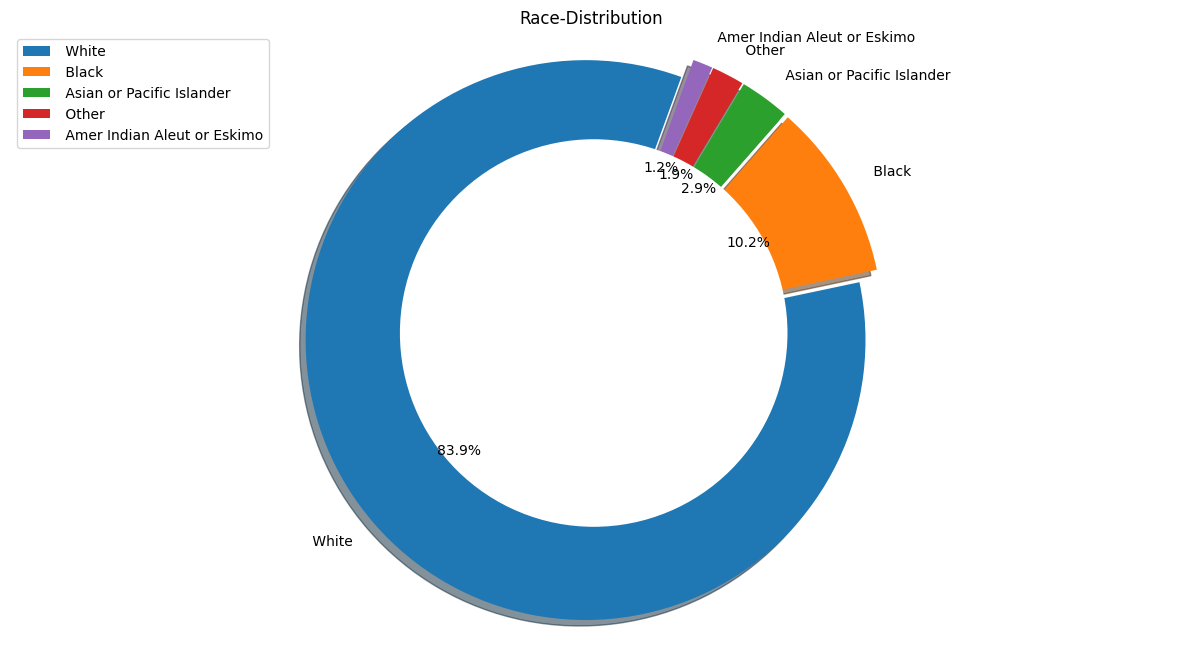

In [143]:
plt.figure(figsize=(15,8))
plt.pie(data=df['race'].value_counts().reset_index(),x='count',labels='race',autopct='%.1f%%',radius=1.3,shadow=True,explode=5*(0.05,),startangle=70)
plt.axis('equal')
plt.legend(loc='upper left')
center_circle = plt.Circle((0,0),0.9,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Race-Distribution')
plt.show()

In [134]:
lis = (0.05)
print(2*lis)

0.1


In [30]:
mdf=df.drop(columns=major_missing_cols)
mdf.head(2)

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record,income_above_limit
0,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,52,...,0,0,292,Native,95,US,US,US,1779.74,Below limit
1,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,...,0,0,0,Native,94,US,US,US,2366.75,Below limit


In [31]:
mdf.shape

(209499, 28)

In [32]:
mdf.isna().sum()

age                           0
gender                        0
education                     0
marital_status                0
race                          0
is_hispanic                   0
employment_commitment         0
employment_stat               0
wage_per_hour                 0
working_week_per_year         0
industry_code                 0
industry_code_main            0
occupation_code               0
total_employed                0
household_stat                0
household_summary             0
vet_benefit                   0
tax_status                    0
gains                         0
losses                        0
stocks_status                 0
citizenship                   0
mig_year                      0
country_of_birth_own       3667
country_of_birth_father    7181
country_of_birth_mother    6516
importance_of_record          0
income_above_limit            0
dtype: int64

In [45]:
#mdf['income_limit']
mdf['income_above_limit'] = mdf['income_above_limit'].apply(lambda x : 1 if x=='Above limit' else 0)


<Axes: >

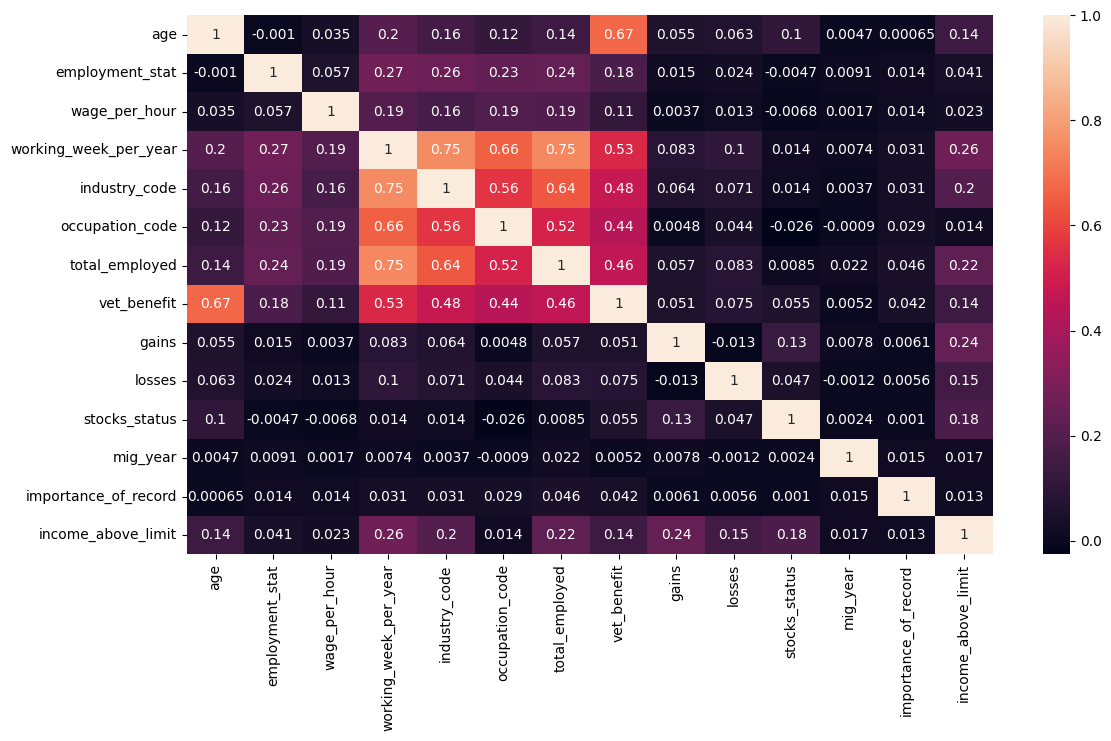

In [54]:
plt.figure(figsize=(13,7))
sns.heatmap(mdf.corr(numeric_only=True),annot=True)

#### With categorizing Age into Age groups

In [104]:
mdf1 = mdf.copy(deep=True)

In [105]:
def age_categ(age):
    if age<=18:
        return 'Below 18'
    elif age>18 and age<=30:
        return 'Young adult(18-30)'
    elif age>30 and age<=60:
        return 'Adult(30-60)'
    elif age>60:
        return 'Senior Citizen'
    else:
        return 'Unknown'
    

In [106]:
mdf1['Age group'] = mdf1['age'].apply(age_categ)

Text(0.5, 1.0, 'Data distribution- Age group wise')

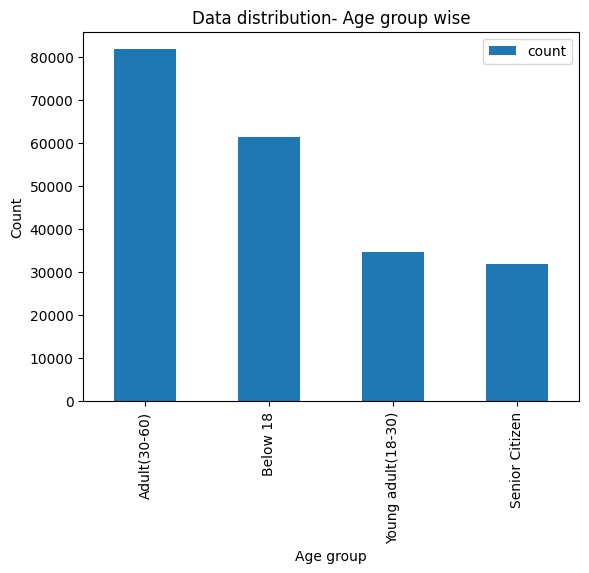

In [107]:
mdf1['Age group'].value_counts().reset_index().plot(kind='bar',x='Age group')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.title('Data distribution- Age group wise')

In [123]:
encoder = HelmertEncoder(cols=['Age group'],drop_invariant=True)
dfh = encoder.fit_transform(mdf1['Age group'])
dfh

,Age group_0,Age group_1,Age group_2
0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0
2,1.0,-1.0,-1.0
3,0.0,2.0,-1.0
4,-1.0,-1.0,-1.0
...,...,...,...
209494,0.0,2.0,-1.0
209495,-1.0,-1.0,-1.0
209496,0.0,2.0,-1.0
209497,1.0,-1.0,-1.0


In [133]:
for col in mdf1.columns.values:
    print(mdf1[col].value_counts(),'\n\n')  #print all the unique values each column has

age
34    3683
35    3621
33    3572
4     3513
5     3507
      ... 
85     446
86     342
87     309
88     266
89     206
Name: count, Length: 91, dtype: int64 


gender
 Female    108784
 Male      100715
Name: count, dtype: int64 


education
 High school graduate                      50627
 Children                                  49685
 Some college but no degree                29320
 Bachelors degree(BA AB BS)                20979
 7th and 8th grade                          8438
 10th grade                                 7905
 11th grade                                 7260
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 9th grade                                  6540
 Associates degree-occup /vocational        5650
 Associates degree-academic program         4494
 5th or 6th grade                           3542
 12th grade no diploma                      2282
 1st 2nd 3rd or 4th grade                   1917
 Prof school degree (MD DDS DVM LLB JD)     1852
 Doctorate degree